In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data
df = pd.read_csv(r"C:\Users\vlogs\OneDrive\Desktop\Churn Prediction\Data\Telco-Customer-Churn.csv")
df.drop('customerID', axis=1, inplace=True)


# Step 1: Fix TotalCharges column
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

# Step 2: Handle missing values in binary categorical columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Step 3: Convert binary categorical columns to numeric (0/1)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


# Step 5: Check and report missing values (should be zero now)
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [2]:
#Basic Statistics
# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Mean
mean_values = df[num_cols].mean()

# Median
median_values = df[num_cols].median()

# Mode (first mode value per column)
mode_values = df[num_cols].mode().iloc[0]

# Combine into a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

print("📊 Summary Statistics (Numeric Columns):")
print(summary_stats)


📊 Summary Statistics (Numeric Columns):
                         Mean   Median   Mode
SeniorCitizen        0.162147     0.00   0.00
Partner              0.483033     0.00   0.00
Dependents           0.299588     0.00   0.00
tenure              32.371149    29.00   1.00
PhoneService         0.903166     1.00   1.00
PaperlessBilling     0.592219     1.00   1.00
MonthlyCharges      64.761692    70.35  20.05
TotalCharges      2279.734304  1394.55   0.00
Churn                0.265370     0.00   0.00


Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


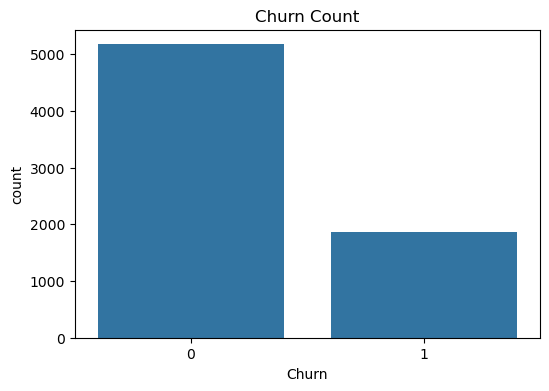

In [3]:
# Target distribution: Churn
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

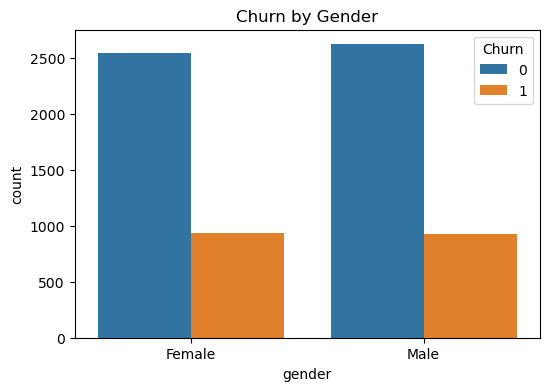

In [4]:
# Explore churn rate by gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

--There is no such difference of churn in the gender--


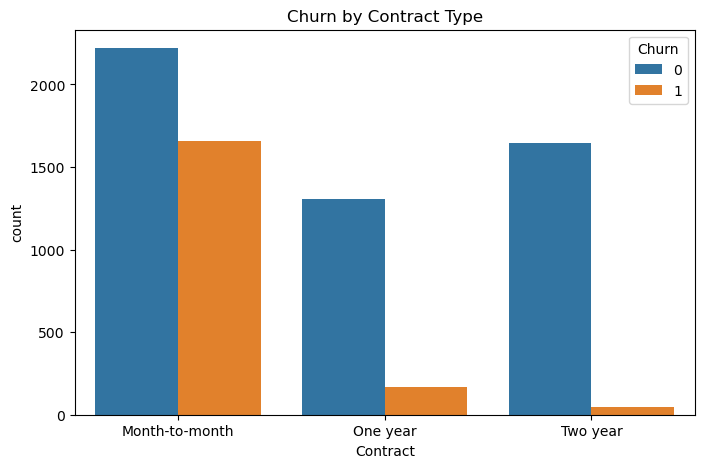

In [5]:
# Churn rate by Contract type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

--Customers with month-to-month contracts have higher churn--


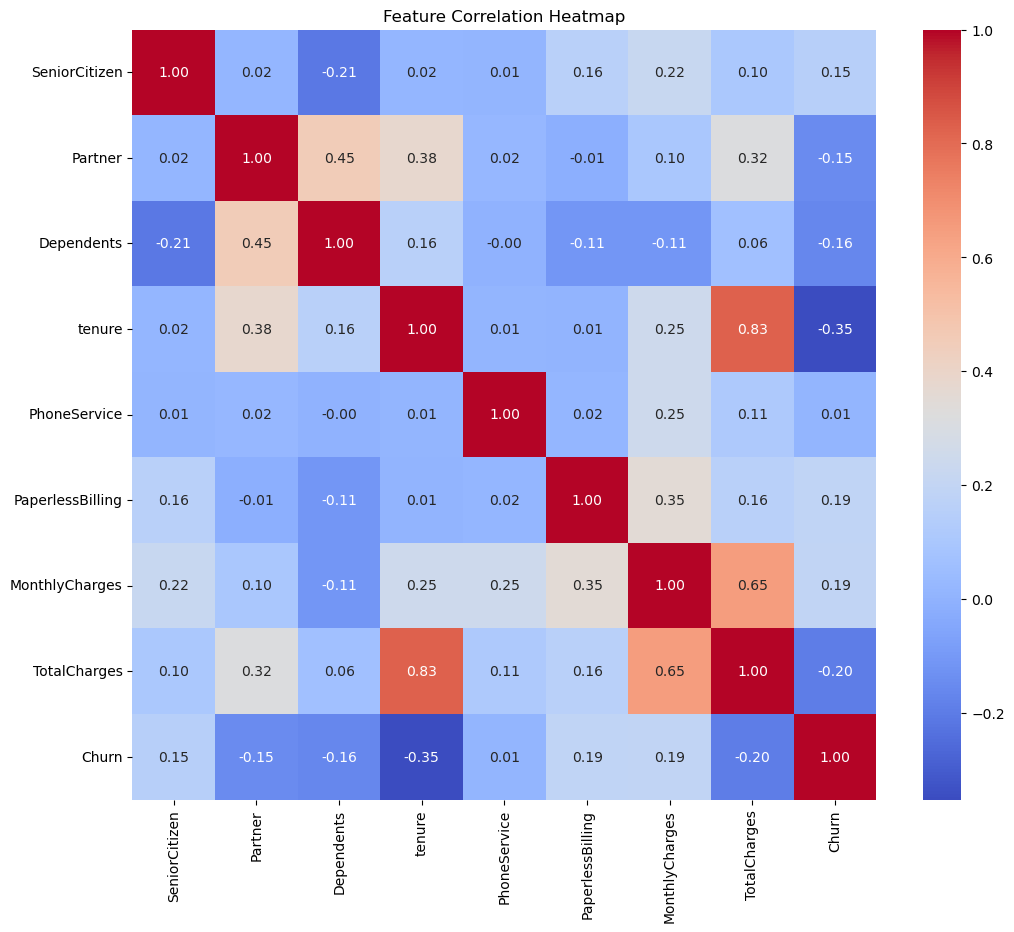

In [6]:
# Step 7: Correlation heatmap on numeric columns only
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
